<a href="https://colab.research.google.com/github/neel26desai/deep_learing_with_low_code_libraries/blob/main/FastAI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from fastai.tabular.all import *
import pandas as pd
import numpy as np


In [ ]:
#creating a dummy dataset o9n which we cna try the to use fast ai for building a regression mode
import pandas as pd
import numpy as np

# Number of samples
n_samples = 1000

# Create a sample regression dataset
data = pd.DataFrame({
    'Numeric_Feature_1': np.random.randn(n_samples),
    'Numeric_Feature_2': np.random.rand(n_samples) * 100,
    'Categorical_Feature_1': np.random.choice(['Category_1', 'Category_2', 'Category_3'], n_samples),
    'Categorical_Feature_2': np.random.choice(['A', 'B', 'C', 'D'], n_samples),
    'Target_Variable': np.random.randn(n_samples) * 10 + 50  # Example target variable
})

# Display the first few rows of the dataset
print(data.head())

   Numeric_Feature_1  Numeric_Feature_2 Categorical_Feature_1  \
0           1.222123          92.838351            Category_3   
1           0.111172          99.639829            Category_2   
2           1.514637          79.600740            Category_3   
3           2.035678          75.373407            Category_2   
4           0.027951          21.550076            Category_3   

  Categorical_Feature_2  Target_Variable  
0                     A        52.247869  
1                     C        39.826651  
2                     A        59.644150  
3                     B        53.625426  
4                     A        38.648382  


In [ ]:
cat_vars = ['Categorical_Feature_1', 'Categorical_Feature_2']
cont_vars = ['Numeric_Feature_1', 'Numeric_Feature_2']
target = 'Target_Variable'

In [ ]:
import fastai

fastai.tabular.core.Categorify

In [ ]:
train_idx, test_idx = RandomSplitter(valid_pct=02,seed=42)(data)

In [ ]:
splits = (train_idx, test_idx)

In [ ]:
#specifying the sprocessing steps
processing_steps = [fastai.tabular.core.Categorify, fastai.tabular.core.FillMissing, fastai.tabular.core.Normalize]
#building a tabularPandas object based on the dataframe
to_nn = fastai.tabular.core.TabularPandas(data, procs=processing_steps, cat_names=cat_vars, cont_names=cont_vars, y_names=target, splits=splits)

In [ ]:
#converting tabular pandas to dls
dls = to_nn.dataloaders(bs=100)

In [58]:
data['Target_Variable'].describe()

count    1000.000000
mean       49.867821
std         9.989079
min        12.912034
25%        42.883075
50%        50.195873
75%        56.865287
max        78.408864
Name: Target_Variable, dtype: float64

In [59]:
tab_learner = tabular_learner(dls, y_range=(12,79) ,loss_func = F.mse_loss ,metrics=mse)

In [60]:
tab_learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,mse,time
0,224.942795,162.961975,162.961975,00:00
1,187.410141,197.652084,197.652084,00:00
2,167.210007,200.648560,200.648560,00:00
3,152.314743,173.566589,173.566589,00:00
4,142.420975,147.194168,147.194168,00:00
5,134.635101,130.398239,130.398239,00:00
6,128.434937,120.405739,120.405739,00:00
7,123.690735,117.414062,117.414062,00:00
8,119.666702,113.761612,113.761612,00:00
9,116.438171,112.948090,112.948090,00:00


In [61]:
tab_learner.show_results()

,Categorical_Feature_1,Categorical_Feature_2,Numeric_Feature_1,Numeric_Feature_2,Target_Variable,Target_Variable_pred
0,3.0,1.0,0.010603,1.370972,62.941853,48.106602
1,2.0,2.0,0.340632,-1.241465,40.804775,47.915241
2,3.0,1.0,0.885516,1.335230,46.860050,46.593025
3,1.0,4.0,-0.425703,-0.486021,61.411713,45.927990
4,1.0,4.0,-0.457210,-1.573941,41.281723,46.178600
5,2.0,1.0,1.113004,-0.807641,65.186241,45.483562
6,1.0,4.0,0.098332,-0.390401,49.013824,42.800594
7,3.0,3.0,0.202517,-0.818821,55.190620,45.411964
8,1.0,2.0,-1.159680,0.273092,57.120316,46.665459


SuggestedLRs(valley=0.0010000000474974513)

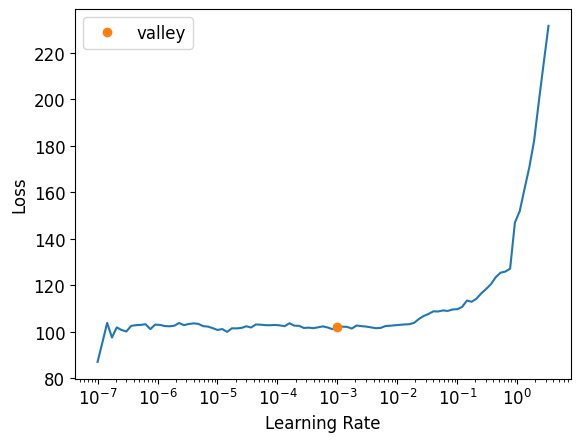

In [63]:
tab_learner.lr_find()

In [64]:
#retraing uing lr as
tab_learner.fit_one_cycle(10,0.0010000000474974513)

epoch,train_loss,valid_loss,mse,time
0,102.508598,112.144295,112.144295,00:00
1,103.354416,112.802582,112.802582,00:00
2,103.537567,116.195671,116.195671,00:00
3,103.714622,105.832283,105.832283,00:00
4,102.754303,125.277420,125.277420,00:00
5,102.919014,109.218536,109.218536,00:00
6,102.325546,115.507217,115.507217,00:00
7,100.571312,105.835426,105.835426,00:00
8,99.088997,106.858459,106.858459,00:00
9,97.993439,107.399681,107.399681,00:00


Our final MSE is much better than what we previously got

In [81]:
#getting the model's prediction on the test set
preds,targs = tab_learner.get_preds()
print(mse(targs,preds))
print(mae(targs,preds))

TensorBase(107.3997)
TensorBase(8.2007)


# Recommendation

Used a songs dataset for building a recommendation system dataset link: https://www.kaggle.com/datasets/rymnikski/dataset-for-collaborative-filters

In [1]:
from fastai.collab import *
from fastai.tabular.all import *
from fastai.vision.all import *

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/songsDataset.csv")

In [4]:
data.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [8]:
data.columns = ['user_id', 'song_id', 'rating']

In [6]:
data.head()

,user_id,song_id,rating
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [7]:
data.shape

(2000000, 3)

In [8]:
data['rating'].value_counts()

5    780134
1    399243
4    344972
3    287831
2    187820
Name: rating, dtype: int64

ratings can be between 1 and 5 (inclusive)

In [9]:
data_subset = data.sample(frac=0.01, random_state=42)

In [10]:
data_subset.shape

(20000, 3)

In [11]:
#count the number of different user_id
data_subset['user_id'].nunique()

19168

In [12]:
#creating a CollabDataLoader from df
data_dl = CollabDataLoaders.from_df(data_subset, bs=128 ,seed=42, valid_pct=0.2)

In [13]:
recomm_learner = collab_learner(data_dl, y_range=(0.5, 5.5))

SuggestedLRs(valley=0.0831763744354248)

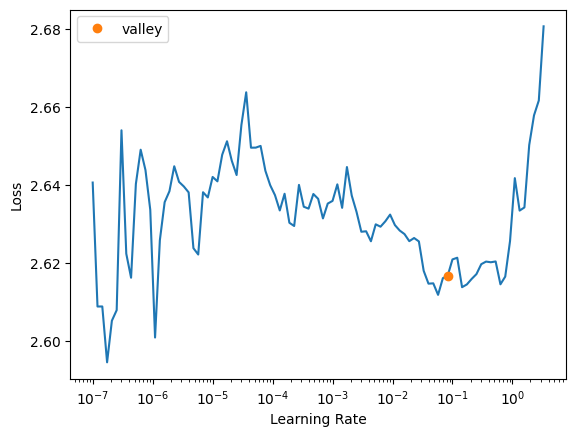

In [14]:
recomm_learner.lr_find()# findig the appropriate learning rate

In [16]:
recomm_learner.fit_one_cycle(5, 0.08)

epoch,train_loss,valid_loss,time
0,4.347919,2.739867,00:03
1,4.531057,2.732654,00:02
2,4.803253,2.745596,00:02
3,4.897819,2.747826,00:02
4,4.685109,2.746150,00:02


In [19]:
recomm_learner.show_results()

,user_id,song_id,rating,rating_pred
0,0,0,1,2.999117
1,0,3363,4,2.641483
2,0,1250,5,2.469881
3,0,8502,4,4.341065
4,0,1723,1,2.199974
5,0,6064,4,2.287176
6,0,4516,4,4.111258
7,0,4436,5,3.354977
8,0,0,1,2.999117


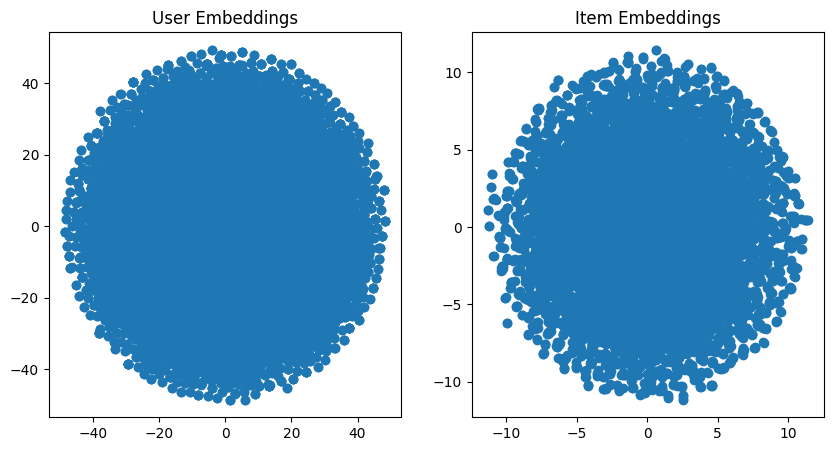

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get the embeddings
user_embeddings = recomm_learner.model.u_weight.weight.cpu().detach().numpy()
item_embeddings = recomm_learner.model.i_weight.weight.cpu().detach().numpy()

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
user_tsne = tsne.fit_transform(user_embeddings)
item_tsne = tsne.fit_transform(item_embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(user_tsne[:, 0], user_tsne[:, 1])
plt.title('User Embeddings')
plt.subplot(1, 2, 2)
plt.scatter(item_tsne[:, 0], item_tsne[:, 1])
plt.title('Item Embeddings')
plt.show()


In [25]:
data_dl.classes.keys()

dict_keys(['user_id', 'song_id'])

In [ ]:
# Get predictions for a specific user
user_id = 1  # Change this to the user ID you want to visualize
user_items = data_dl.classes['song_id']
user_item_ids = [recomm_learner.dls.classes['song_id'].o2i[item] for item in user_items]

# Get predictions
predictions = [recomm_learner.predict(user_id, item_id)[0] for item_id in user_item_ids]

# Sort items by prediction score
sorted_items = sorted(zip(user_items, predictions), key=lambda x: x[1], reverse=True)

# Plot the top predictions
plt.figure(figsize=(10, 5))
items, scores = zip(*sorted_items[:10])
plt.barh(items, scores)
plt.xlabel('Predicted Rating')
plt.title(f'Top Recommendations for User {user_id}')
plt.gca().invert_yaxis()
plt.show()

In [35]:
user_id=182840
item_id = 115424

In [47]:
test_data = data_subset.sample(frac=0.2, random_state=42)

In [48]:
test_dl= data_dl.test_dl(test_data)

In [64]:
#finding similaritites between 2 songs, the logic being if a paerson likes A then they'll like b as well
song = data_dl.classes['song_id'][42] #obtaining the weights for a particular song
w1 = recomm_learner.weight([song])
song2 = data_dl.classes['song_id'][43]
w2 = recomm_learner.weight([song2])

In [66]:
#finding the similairty between the 2 songs
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(w1, w2)

In [67]:
sim

array([[0.3988613]], dtype=float32)